In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("vgsales.csv")

In [3]:
#ydata_profiling.ProfileReport(df)

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16719, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
df.describe(include="object")

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


In [9]:
df.loc[df["User_Score"]=="tbd"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
119,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.45,2.59,0.0,0.66,6.71,NaN,NaN,tbd,NaN,"Pipeworks Software, Inc.",E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.0,0.54,3.98,61.0,21.0,tbd,NaN,Digital Eclipse,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,Majesco Entertainment,1.51,1.03,0.0,0.27,2.81,NaN,NaN,tbd,NaN,"Majesco Games, Majesco",T
645,uDraw Studio,Wii,2010.0,Misc,THQ,1.65,0.57,0.0,0.20,2.42,71.0,9.0,tbd,NaN,THQ,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.0,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.0,0.00,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.0,0.00,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.0,0.00,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.00,0.01,NaN,NaN,tbd,NaN,Big John Games,E


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

<Axes: >

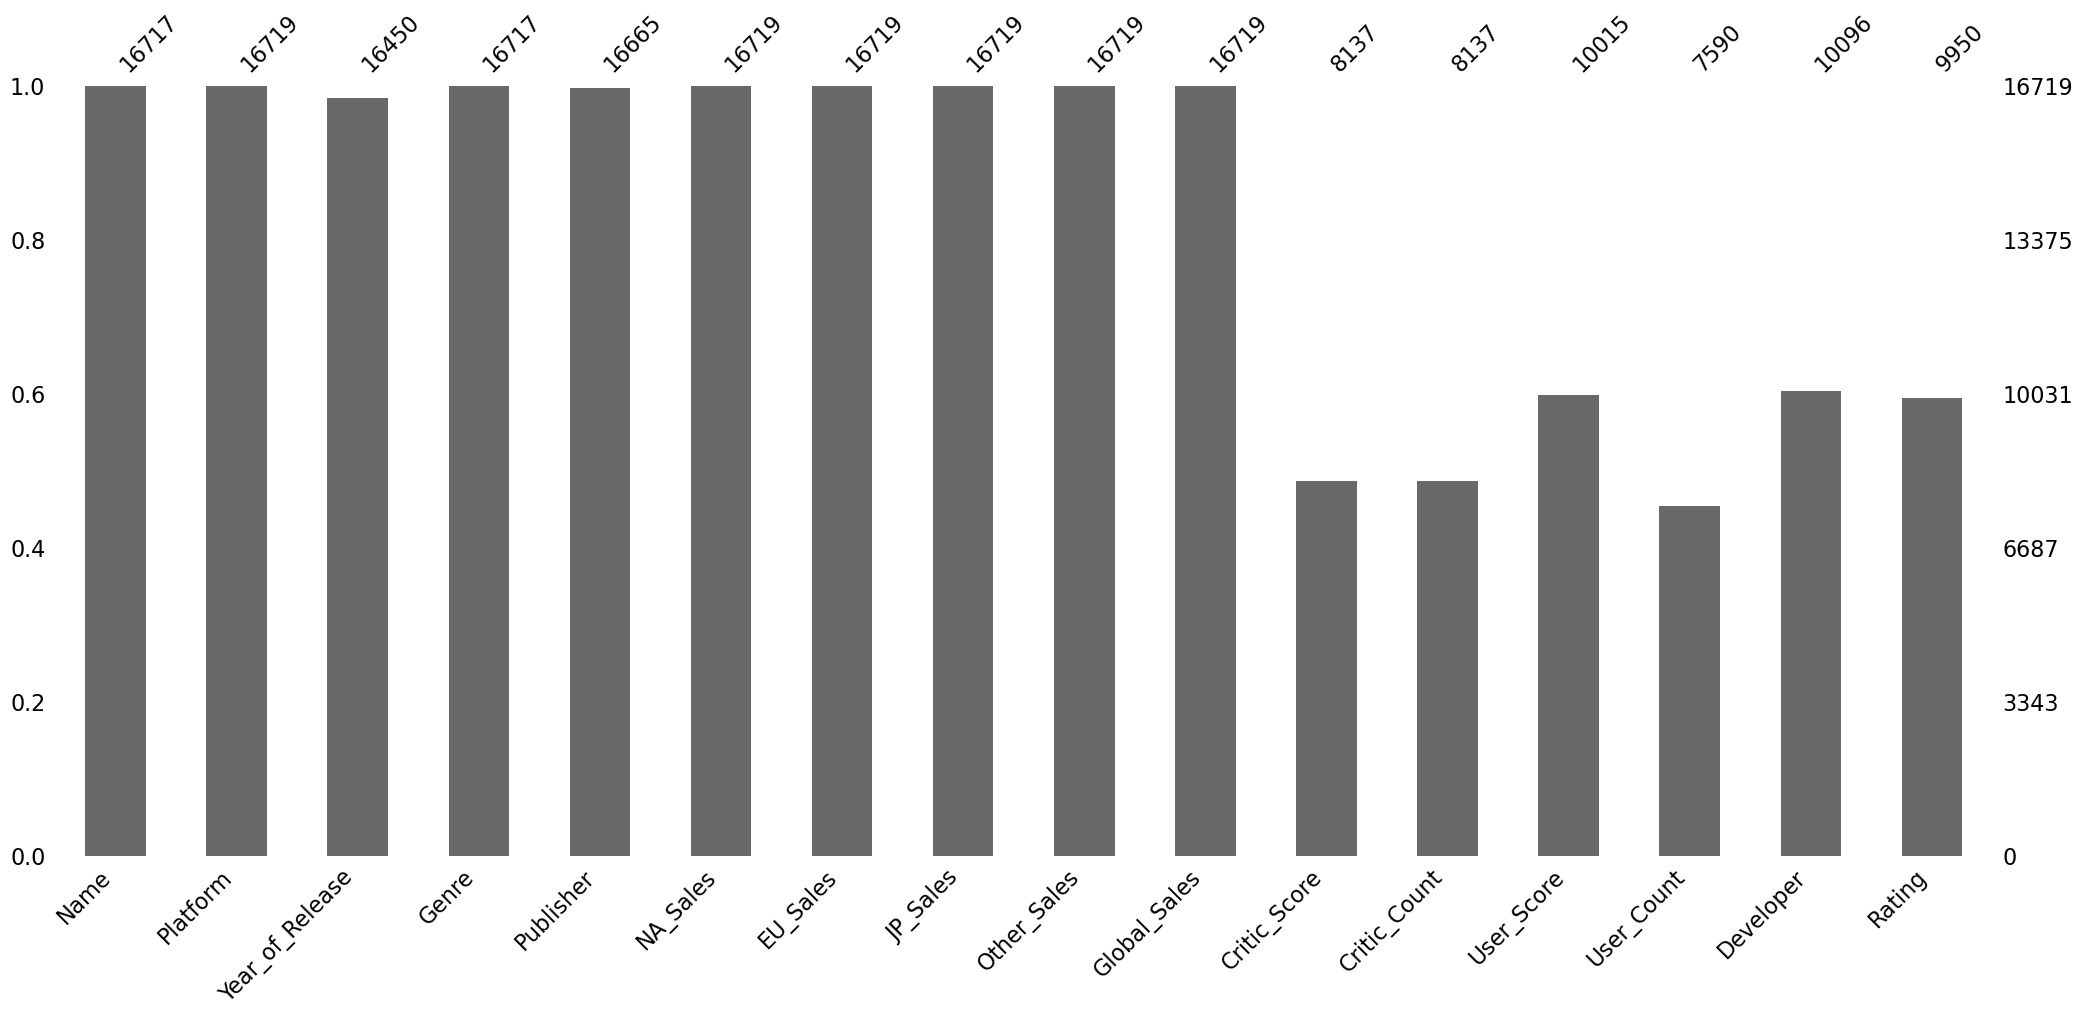

In [12]:
msno.bar(df, n=16719)

In [13]:
missing_data=["tbd"]
df=pd.read_csv("vgsales.csv",na_values=missing_data)

In [14]:
df.dropna(subset=["Name","Year_of_Release","Genre","Publisher"],inplace= True)

In [15]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8434
Critic_Count       8434
User_Score         8955
User_Count         8955
Developer          6512
Rating             6649
dtype: int64

In [16]:
df.shape

(16416, 16)

<Axes: xlabel='Critic_Score', ylabel='Count'>

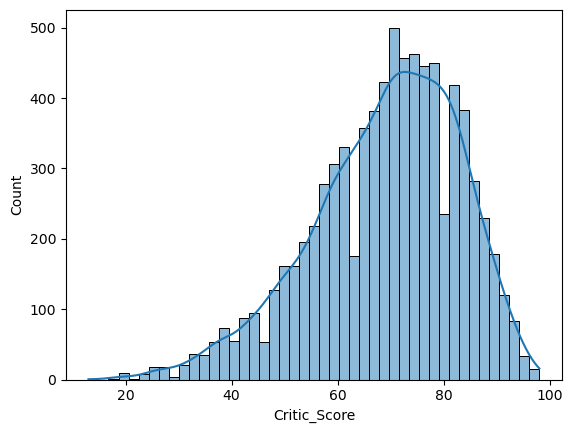

In [17]:
sns.histplot(df,x="Critic_Score", kde=True)

<Axes: xlabel='Critic_Count', ylabel='Count'>

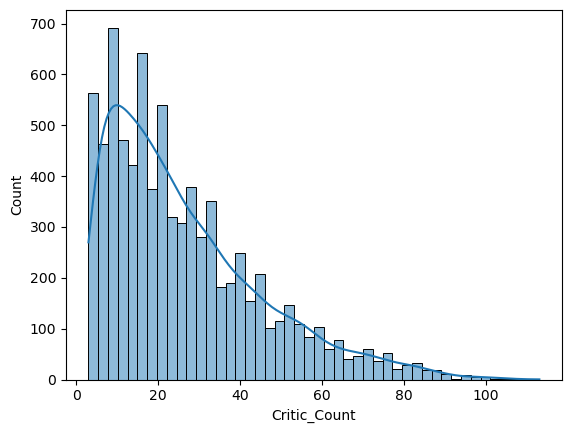

In [18]:
sns.histplot(df,x="Critic_Count", kde=True)

<Axes: xlabel='User_Count', ylabel='Count'>

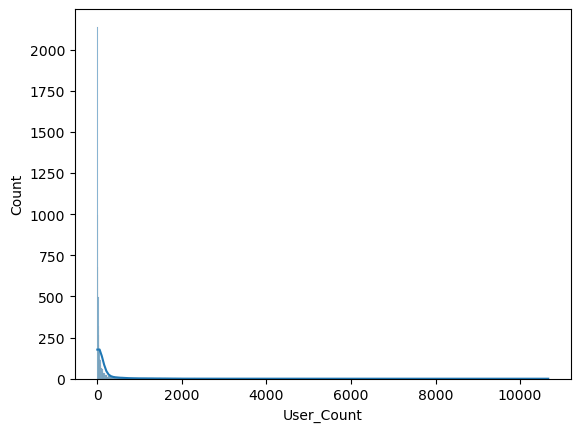

In [19]:
sns.histplot(df,x="User_Count", kde=True)

<Axes: xlabel='User_Score', ylabel='Count'>

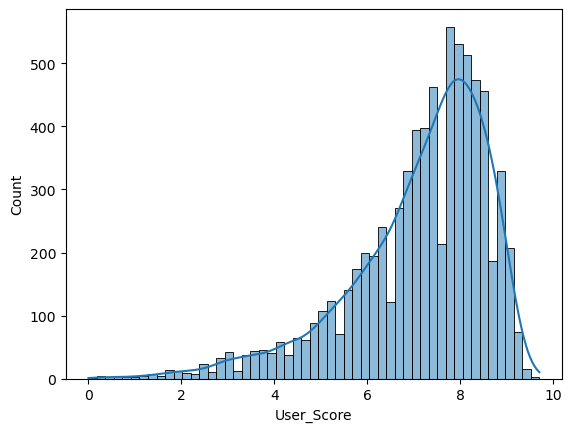

In [20]:
User_Score_find_shape=df.dropna(subset=["User_Score"])
User_Score_find_shape["User_Score"] = User_Score_find_shape["User_Score"].astype(float)

sns.histplot(User_Score_find_shape,x="User_Score", kde=True)

From the 4 graphs it is suitable to replace the Null values with teh median 

In [21]:
df["Critic_Count"].fillna(df["Critic_Count"].median(), inplace=True)
df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
df["User_Count"].fillna(df["User_Count"].median(), inplace=True)

In [22]:
User_Score_find_shape["User_Score"].median()

7.5

In [23]:
df["User_Score"].fillna(value=7.5, inplace=True)
df["User_Score"]=df["User_Score"]*10

In [24]:
df["NA_Sales"]=df["NA_Sales"]*1000000
df["EU_Sales"]=df["EU_Sales"]*1000000
df["JP_Sales"]=df["JP_Sales"]*1000000
df["Global_Sales"]=df["Global_Sales"]*1000000

In [25]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)
df['Critic_Count']=df['Critic_Count'].astype(int)
df['User_Count']=df['User_Count'].astype(int)
df["User_Score"]=df["User_Score"].astype(int)

In [26]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6512
Rating             6649
dtype: int64

In [27]:
dfQ1_1=df.nlargest(5,"Global_Sales",keep="all")

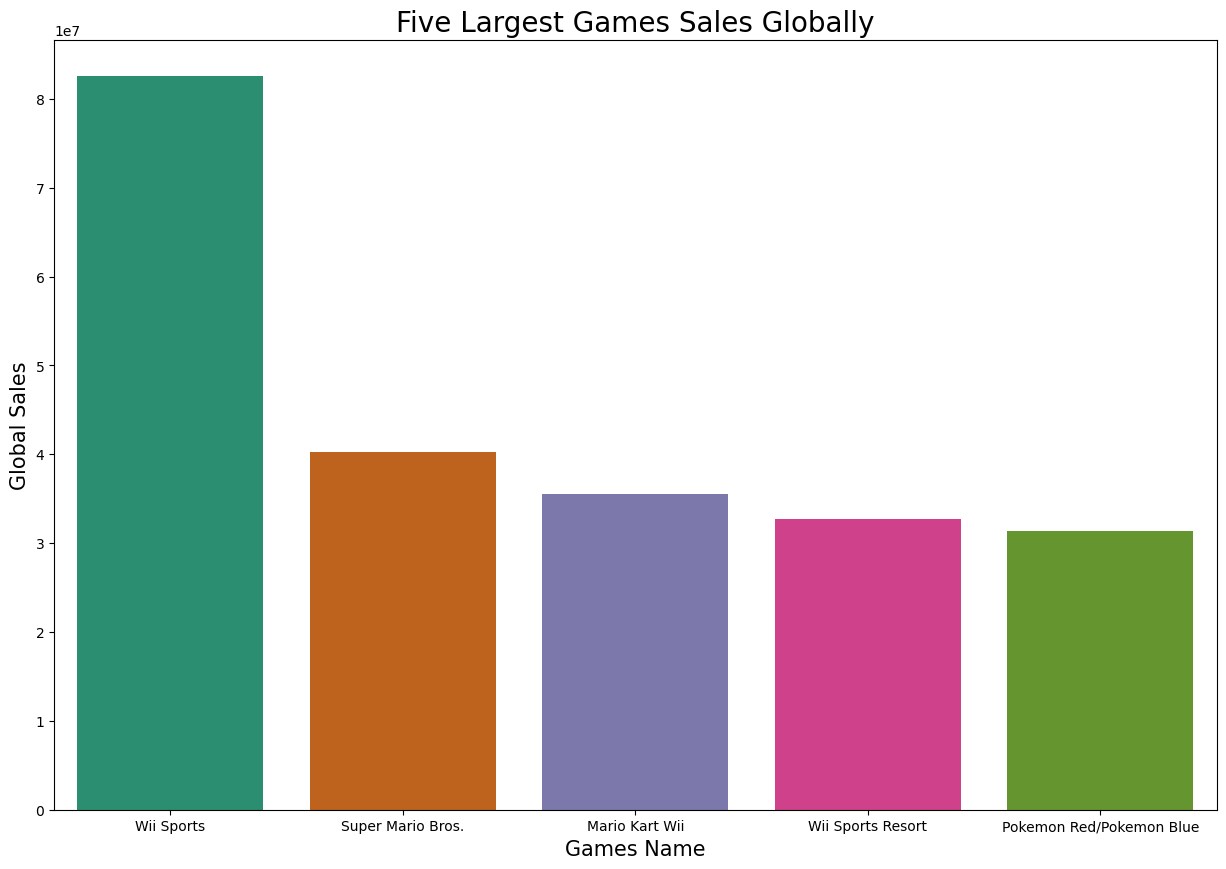

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(dfQ1_1,x="Name",y="Global_Sales",palette="Dark2")
plt.title("Five Largest Games Sales Globally",fontsize=20)
plt.xlabel("Games Name",fontsize=15)
plt.ylabel("Global Sales",fontsize=15);

In [29]:
dfQ1_2=df[(df["Year_of_Release"]>=2010) & (df["Year_of_Release"]<=2014)]

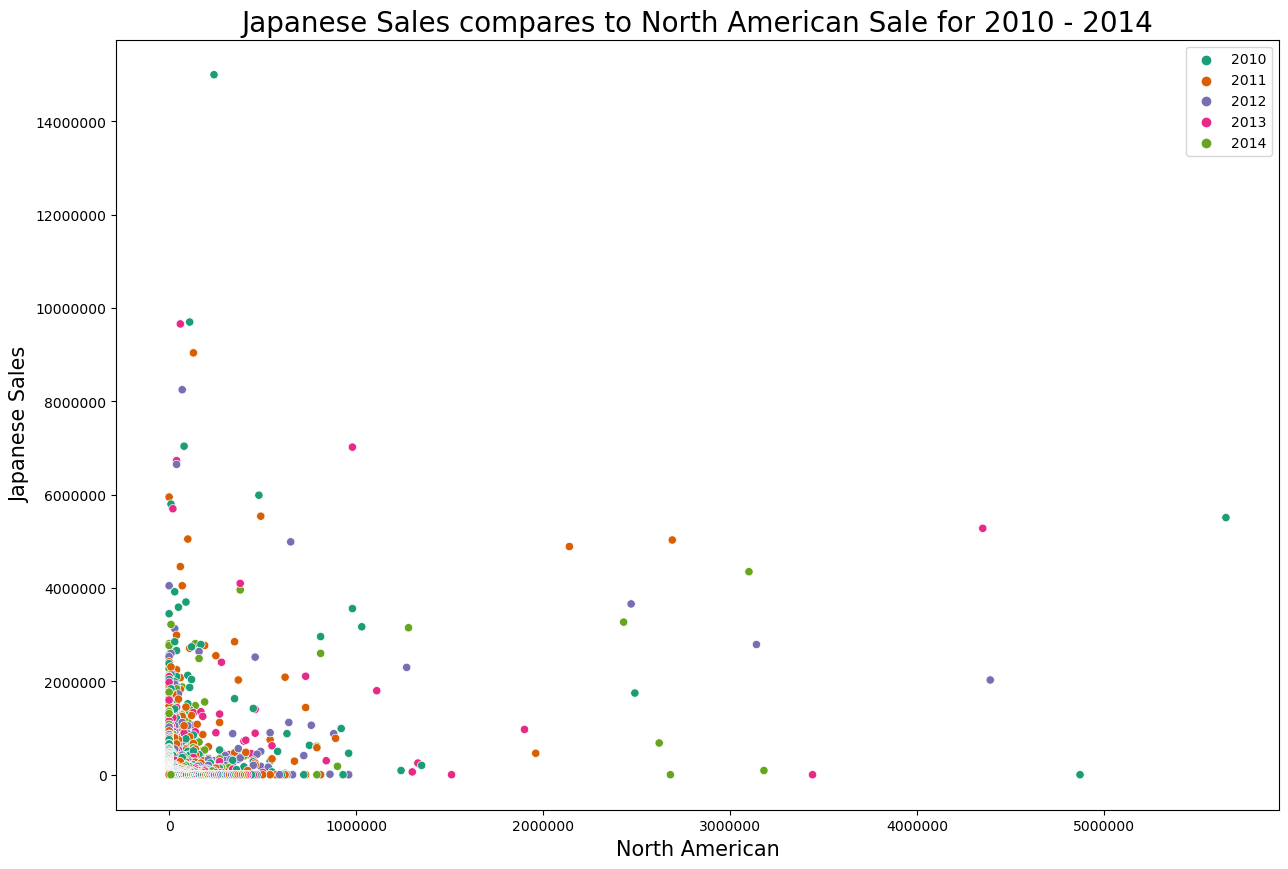

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release", palette="Dark2")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style="plain");

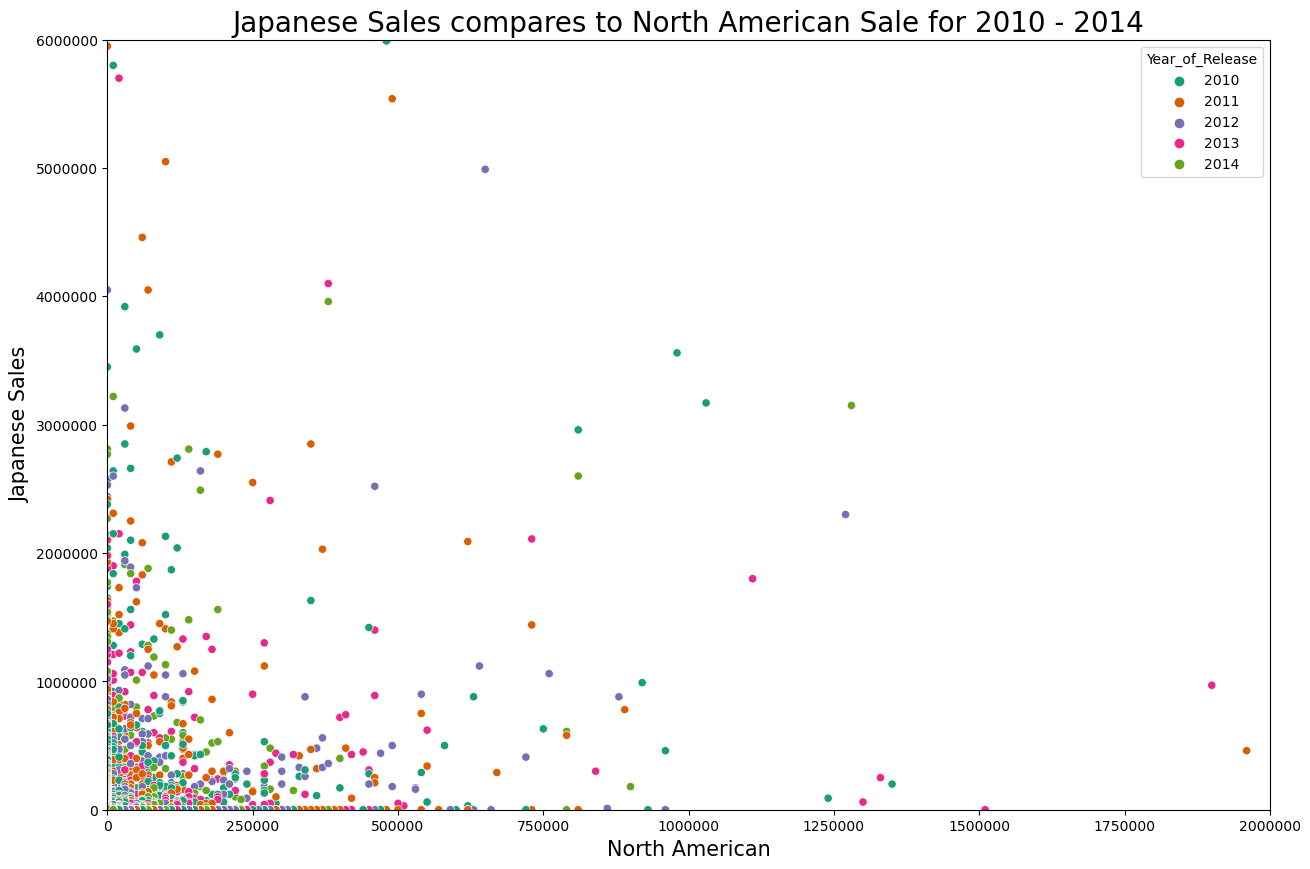

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release", palette="Dark2")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,2000000)
plt.ylim(0,6000000)
plt.ticklabel_format(style="plain");

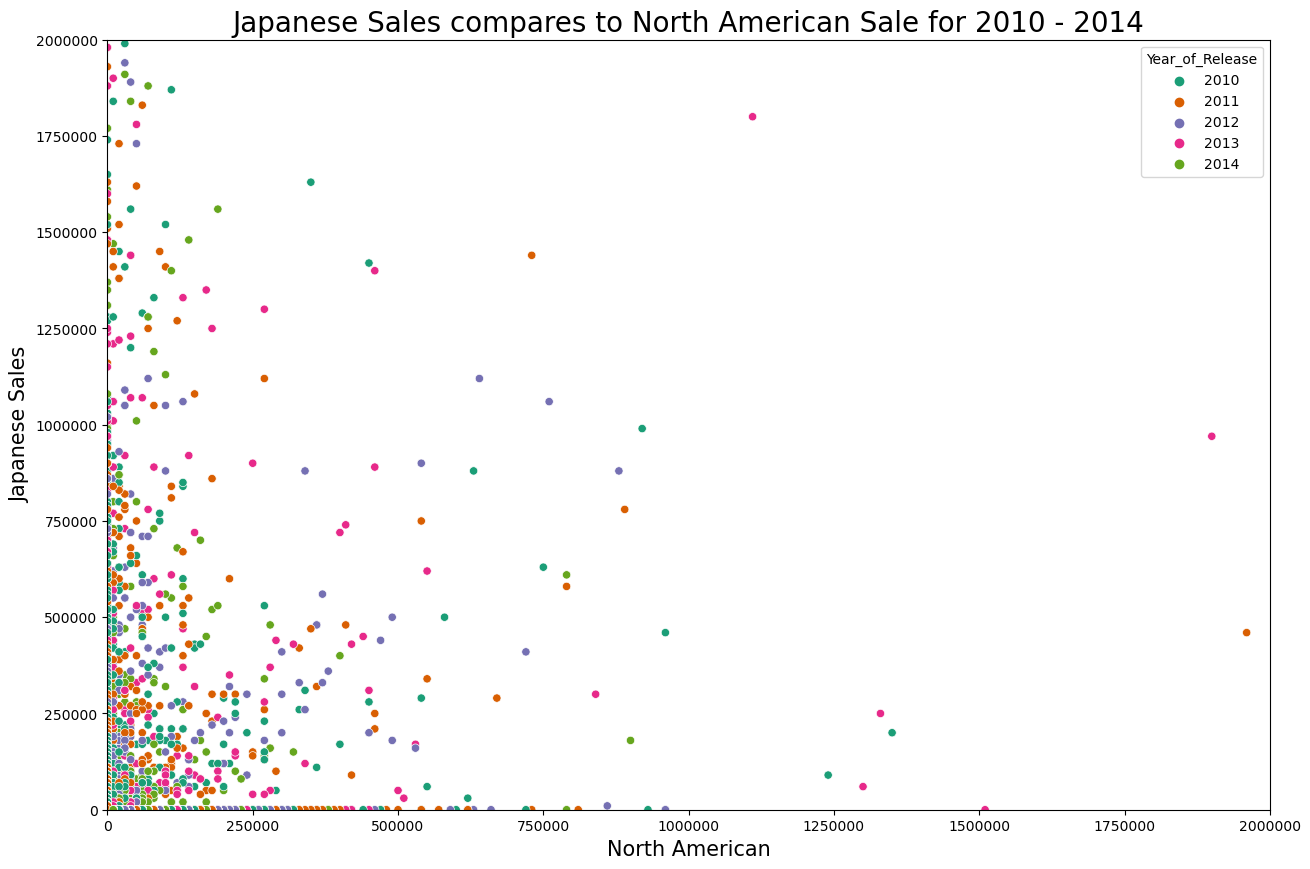

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release",palette="Dark2")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.ticklabel_format(style="plain");

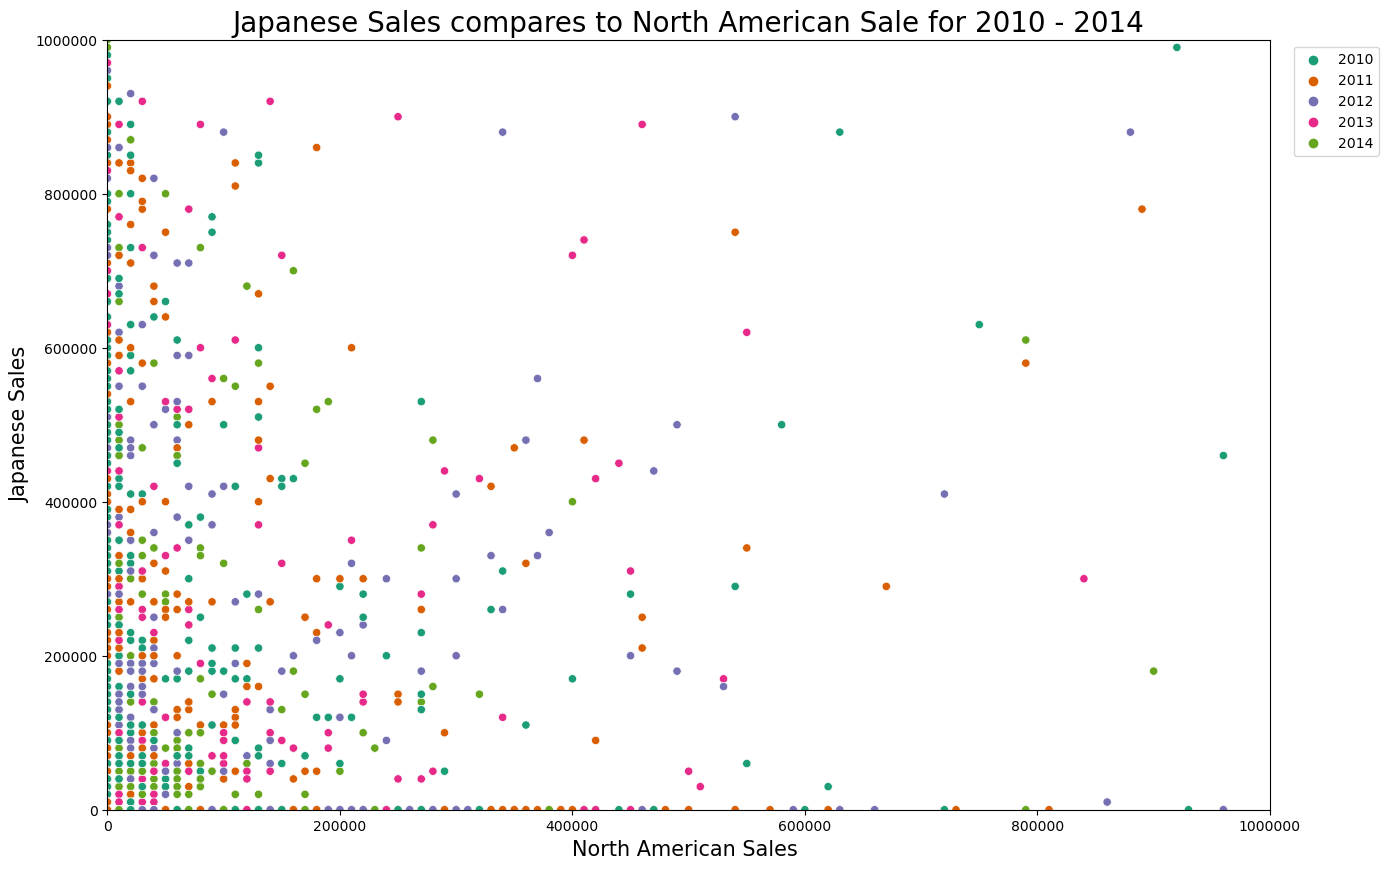

In [33]:
plt.figure(figsize=(15,10))
sns.scatterplot(dfQ1_2,x="JP_Sales",y="NA_Sales",hue="Year_of_Release",palette="Dark2")
plt.title("Japanese Sales compares to North American Sale for 2010 - 2014",fontsize=20)
plt.xlabel("North American Sales ",fontsize=15)
plt.ylabel("Japanese Sales",fontsize=15)
plt.xlim(0,1000000)
plt.ylim(0,1000000)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ticklabel_format(style="plain");

In [ ]:
df["Genre"].value_counts()

In [ ]:
Action=df[df["Genre"]=="Action"]
Sports=df[df["Genre"]=="Sports"]
Role_Playing=df[df["Genre"]=="Role-Playing"]
Shooter=df[df["Genre"]=="Shooter"]

In [ ]:
dfQ1_3=pd.concat([Action,Sports,Role_Playing,Shooter])
dfQ1_3=pd.DataFrame(dfQ1_3)

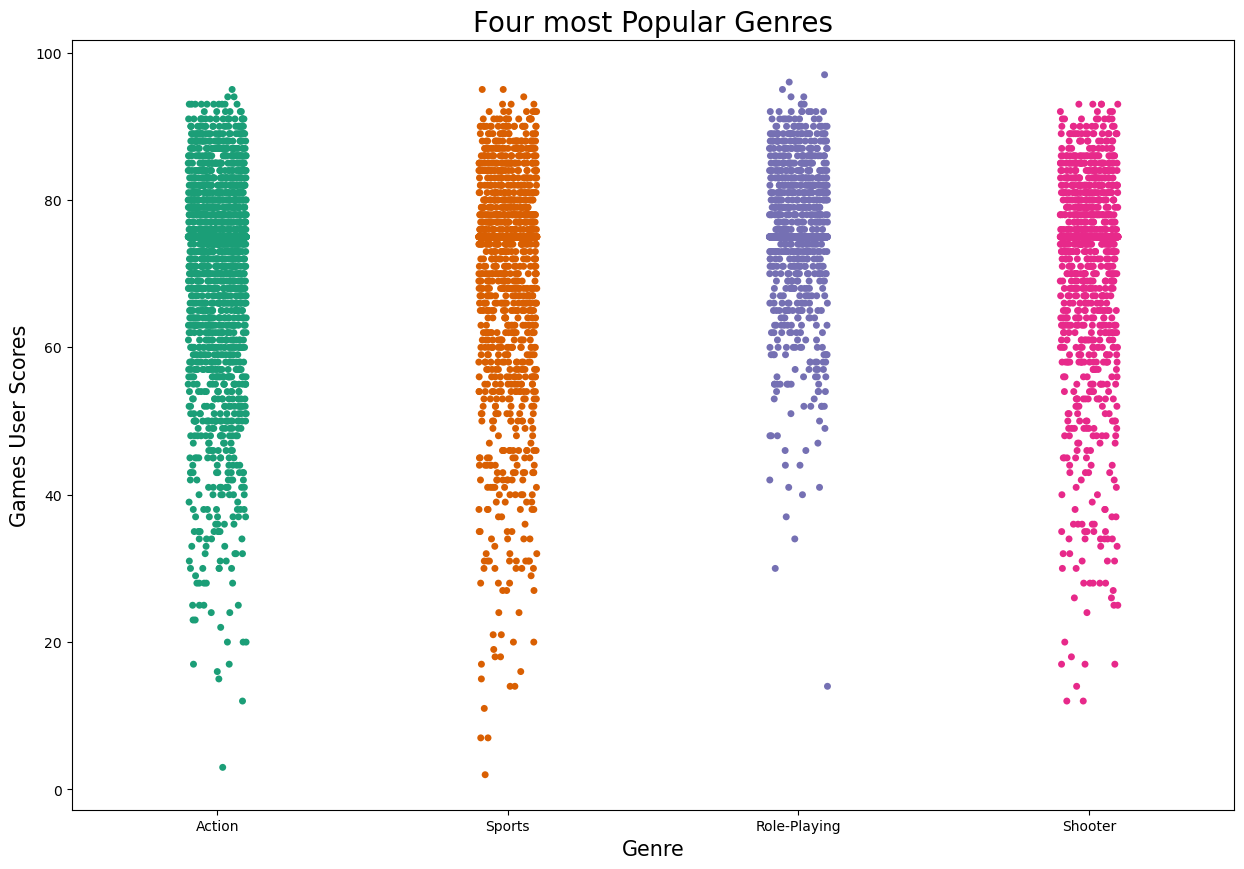

In [37]:
plt.figure(figsize=(15,10))
sns.stripplot(dfQ1_3,x="Genre", y="User_Score",palette="Dark2")
plt.title("Four most Popular Genres",fontsize=20)
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Games User Scores",fontsize=15);

In [38]:
dfQ1_4=df.groupby("Year_of_Release")["EU_Sales"].mean()
dfQ1_4=pd.DataFrame(dfQ1_4)
dfQ1_4.reset_index(inplace=True)

In [39]:
col=["red" if year<2006 else "blue" for year in dfQ1_4["Year_of_Release"]]

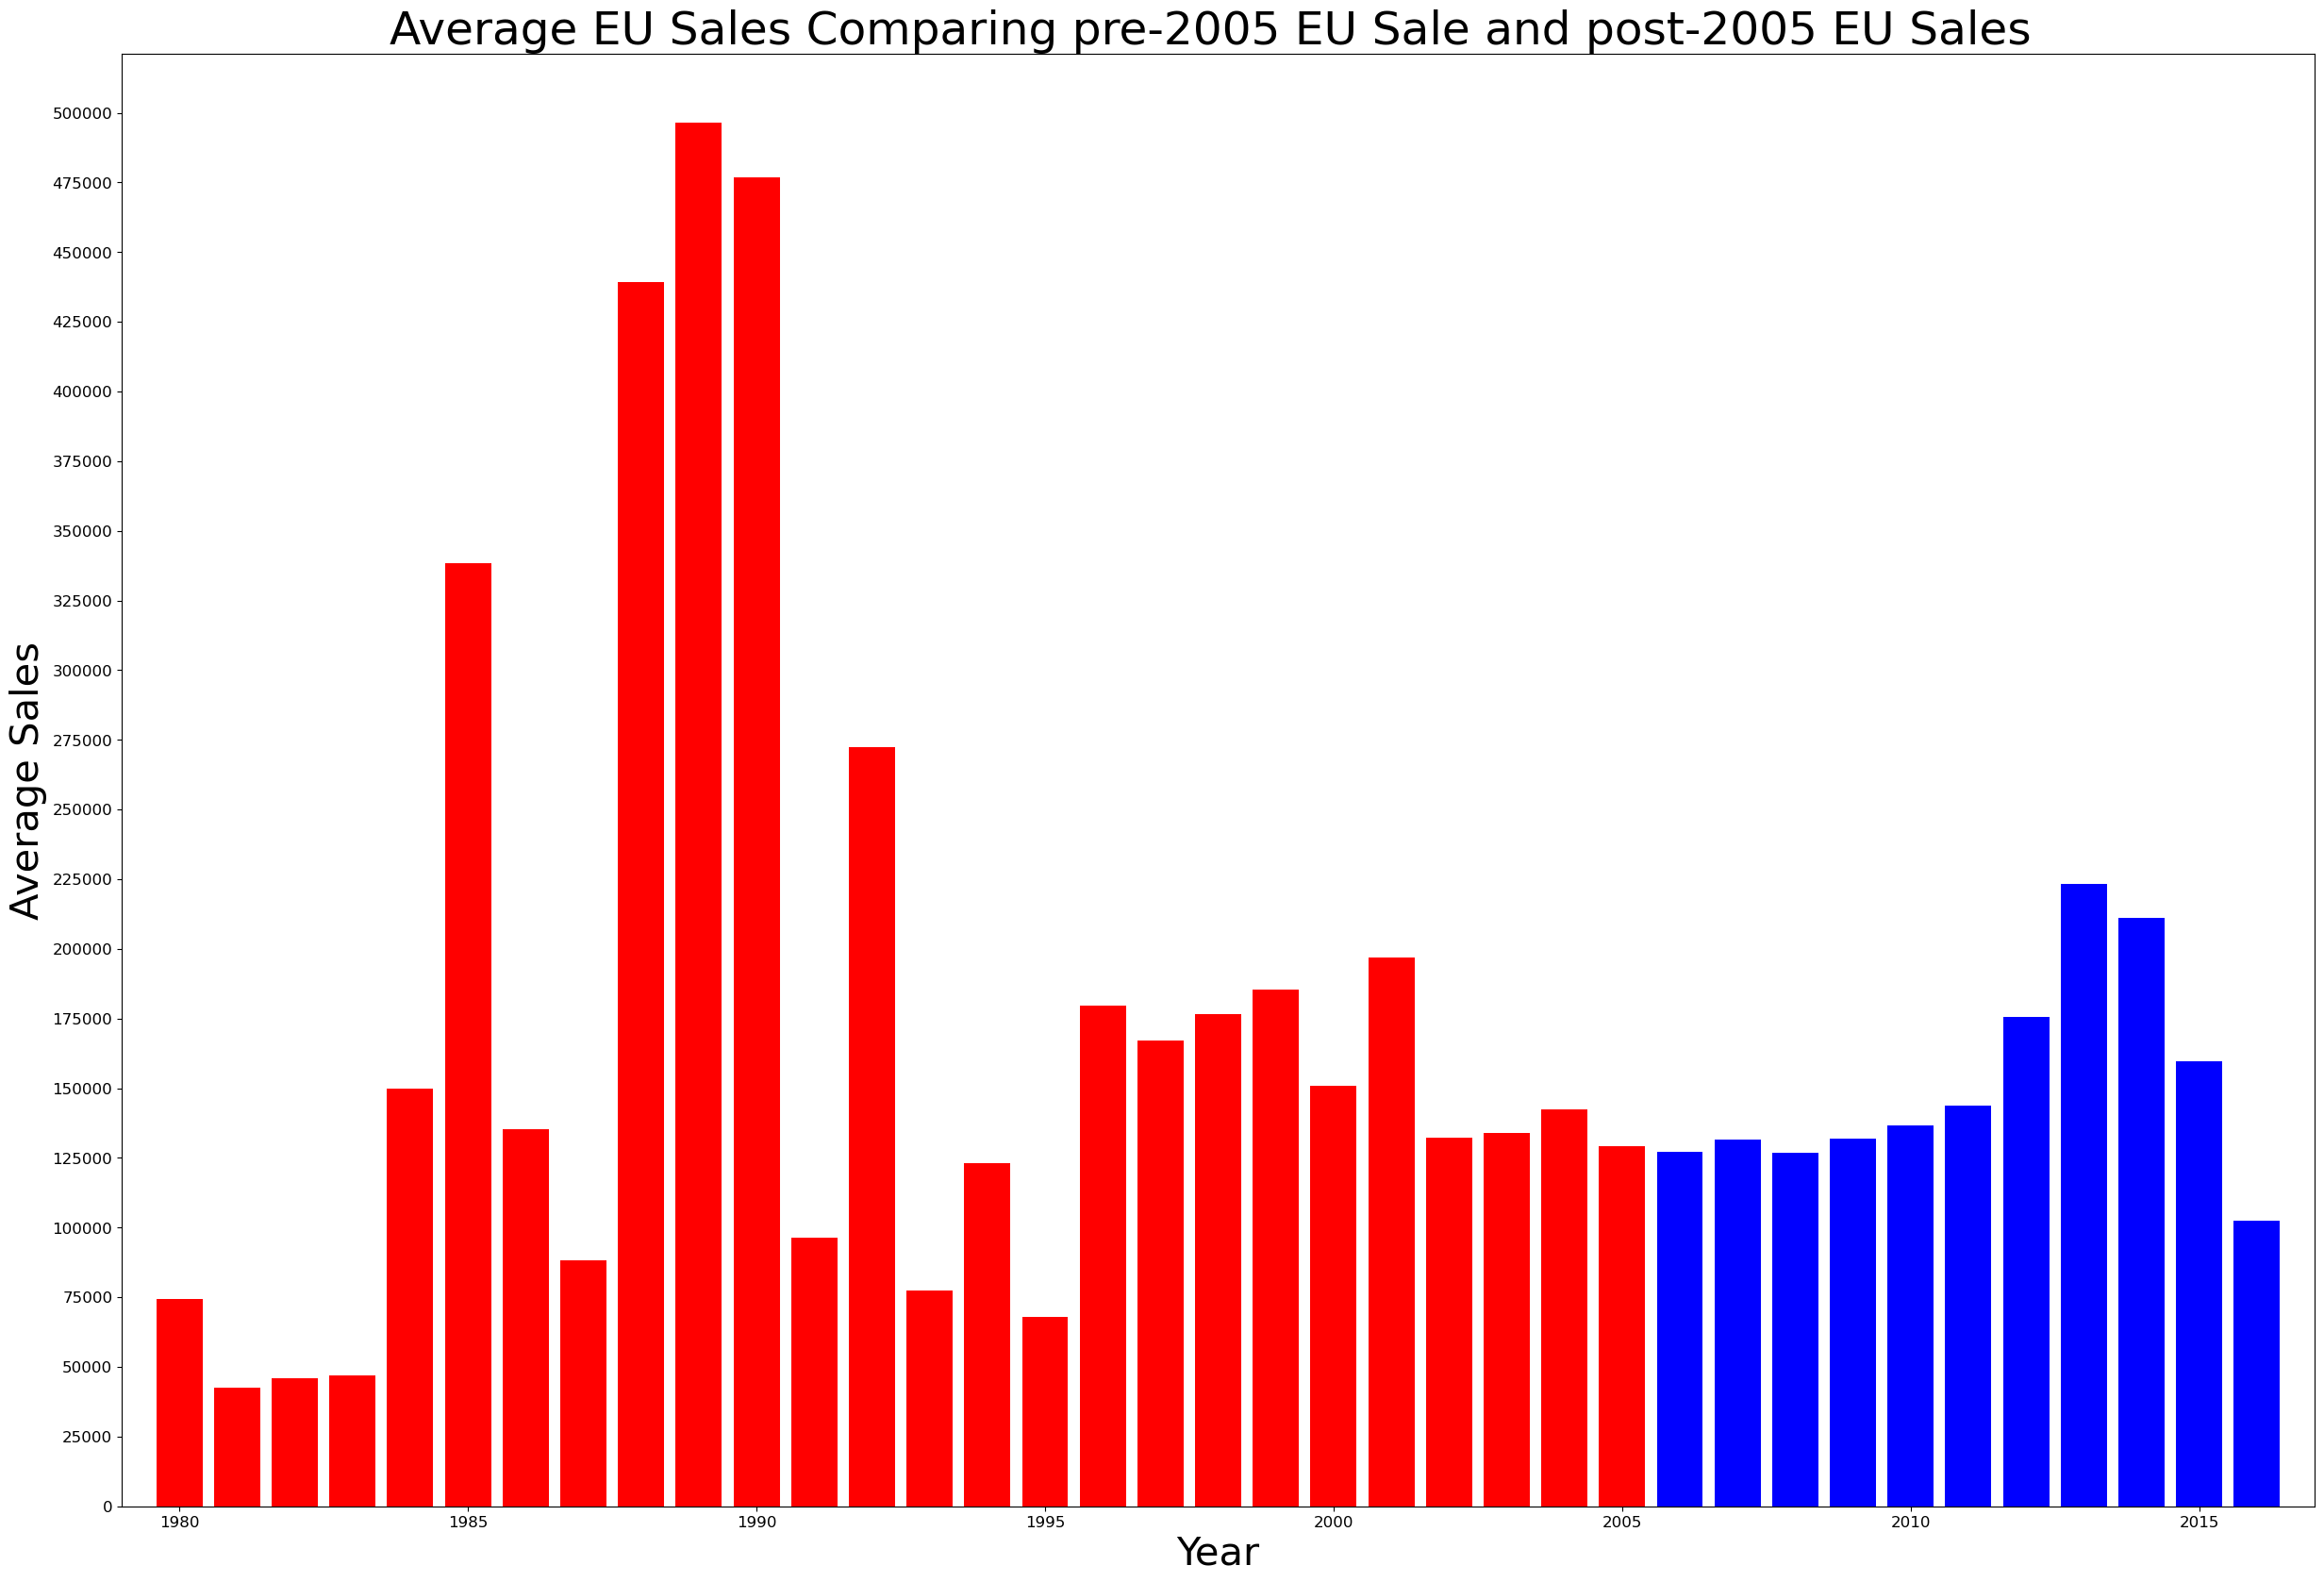

In [40]:
plt.figure(figsize=(30,20))
plt.bar(dfQ1_4["Year_of_Release"],dfQ1_4["EU_Sales"],color=col)
plt.title("Average EU Sales Comparing pre-2005 EU Sale and post-2005 EU Sales ",fontsize=35)
plt.xlabel("Year",fontsize=30)
plt.ylabel("Average Sales",fontsize=30)
plt.xlim(1979,2017)
plt.yticks(np.arange(0,520000,25000))
plt.tick_params(labelsize='large');

In [41]:
dfQ1_5 = pd.DataFrame({"Number of Games":df["Developer"].value_counts()})

dfQ1_5.reset_index(inplace=True)

dfQ1_5=dfQ1_5.nlargest(3,"Number of Games",keep="all")

dfQ1_5

,index,Number of Games
0,Ubisoft,201
1,EA Sports,169
2,EA Canada,164


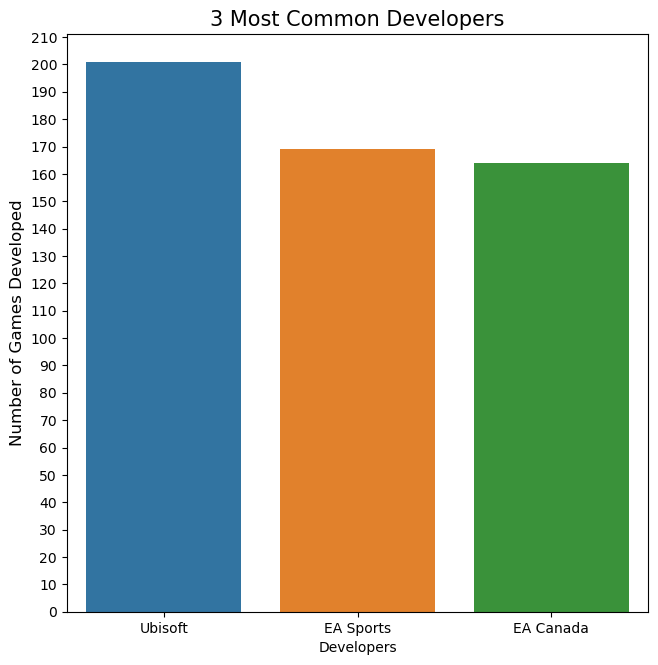

In [42]:
plt.figure(figsize=(7.5,7.5))
sns.barplot(dfQ1_5,x="index", y="Number of Games") 
plt.title("3 Most Common Developers",fontsize=15)
plt.xlabel("Developers",fontsize=10) 
plt.ylabel("Number of Games Developed",fontsize=12)
plt.yticks(np.arange(0,220,10));

In [43]:
#dfQ2 = pd.DataFrame({"Number of Games":df["Platform"].value_counts(), "Average User Score":df.groupby("Platform")["User_Score"].mean(), "Global_Sales":df.groupby("Platform")["Global_Sales"].mean()})
#dfQ2.reset_index(inplace=True)
#pd.options.display.float_format = '{:.2f}'.format

In [44]:
#dfQ2

In [48]:
df["Platform"].value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [49]:
PS2=df[df["Platform"]=="PS2"] 
DS=df[df["Platform"]=="DS"] 
PS3=df[df["Platform"]=="PS3"] 
Wii=df[df["Platform"]=="Wii"]
PSP=df[df["Platform"]=="PSP"]

In [51]:
dfQ2=pd.concat([PS2,DS,PS3,Wii,PSP]) 
dfQ2=pd.DataFrame(dfQ2)
dfQ2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9430000.0,400000.0,410000.0,10.57,20810000.0,95.0,80,90,1588,Rockstar North,M
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8410000.0,5490000.0,470000.0,1.78,16150000.0,95.0,62,87,730,Rockstar North,M
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6850000.0,5090000.0,1870000.0,1.16,14980000.0,95.0,54,84,314,Polyphony Digital,E
38,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6990000.0,4510000.0,300000.0,1.30,13100000.0,97.0,56,85,664,DMA Design,M
48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3010000.0,10000.0,1100000.0,7.53,11660000.0,89.0,74,85,272,Polyphony Digital,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16663,Hyakki Yagyou Kaidan Romance,PSP,2012,Action,Quinrose,0.0,0.0,10000.0,0.00,10000.0,71.0,22,75,24,NaN,NaN
16683,XI Coliseum,PSP,2006,Puzzle,Sony Computer Entertainment,0.0,0.0,10000.0,0.00,10000.0,71.0,22,75,24,NaN,NaN
16686,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,Prototype,0.0,0.0,10000.0,0.00,10000.0,71.0,22,75,24,NaN,NaN
16691,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.0,0.0,10000.0,0.00,10000.0,71.0,22,75,24,NaN,NaN


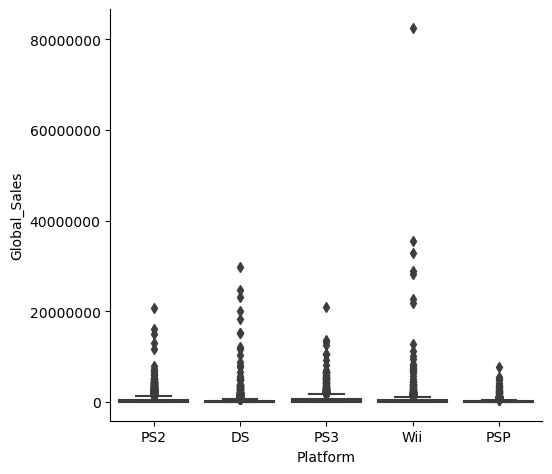

In [58]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2)

plt.ticklabel_format(style="plain",axis="y");

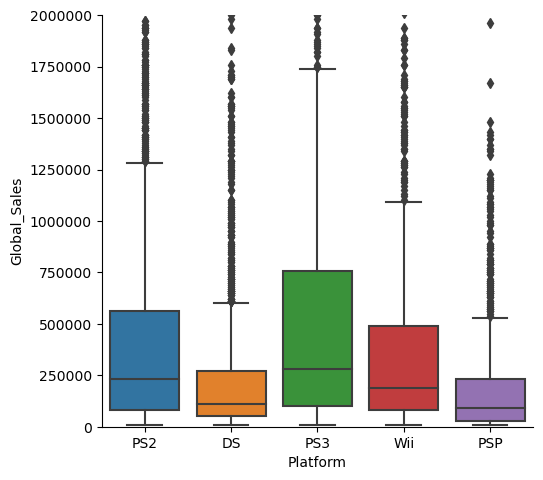

In [59]:
sns.catplot(x="Platform", y="Global_Sales", kind = "box", data=dfQ2)
plt.ylim(0,2000000)
plt.ticklabel_format(style="plain",axis="y");